<a href="https://colab.research.google.com/github/prakashb-ai/cartoon_effect/blob/main/PROJECT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
##Importing the modules of the projects
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
from PIL import ImageEnhance
from PIL import Image, ImageDraw

In [91]:
def read_file(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img


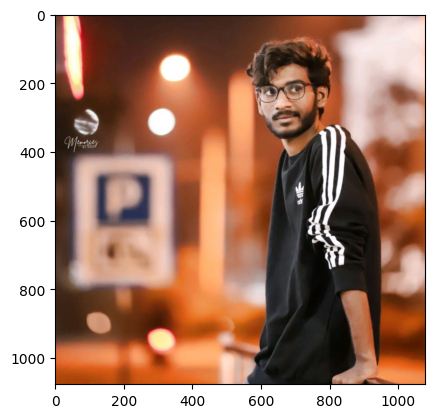

In [89]:
filename = '/content/prakash.jpg'
img = read_file(filename)
org_img = np.copy(img)


In [92]:
## CREATE EDGE MASK

def edge_mask(img,line_size,blur_value):
  gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray,blur_value)

  edges = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,
                                line_size,blur_value)
  return edges



Effects of the images


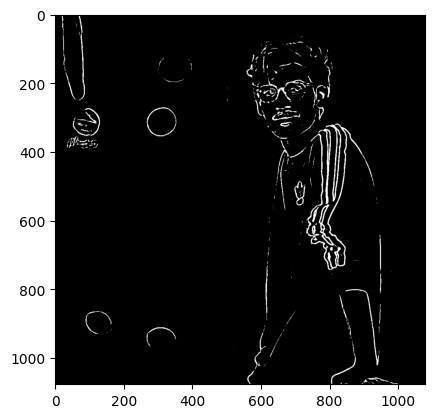

In [93]:
##effects of the images
line_size,blur_value=7,7
edges =edge_mask(img,line_size,blur_value)

plt.imshow(edges ,cmap="binary")
plt.show()


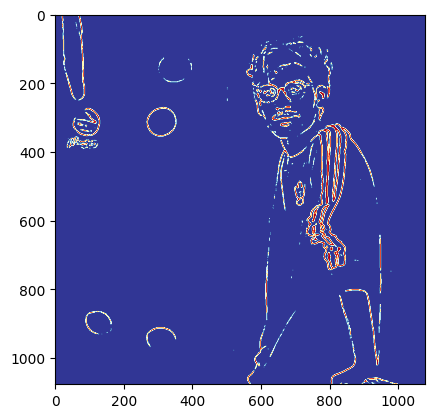

In [94]:
##effects of the images
line_size,blur_value=7,7
edges =edge_mask(img,line_size,blur_value)

plt.imshow(edges ,cmap="RdYlBu")
plt.show()


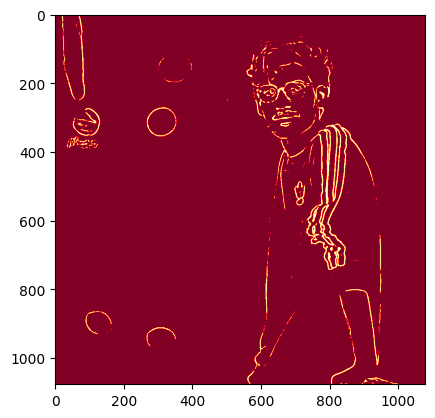

In [95]:
##effects of the images
line_size,blur_value=7,7
edges =edge_mask(img,line_size,blur_value)

plt.imshow(edges ,cmap="YlOrRd")
plt.show()


In [96]:
##REDUCE THE COLOR PLATETTE
def color_qunatization(img,k):
  data = np.float32(img).reshape((-1,3))
  criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
  ret ,label ,center = cv2.kmeans(data, k,None ,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

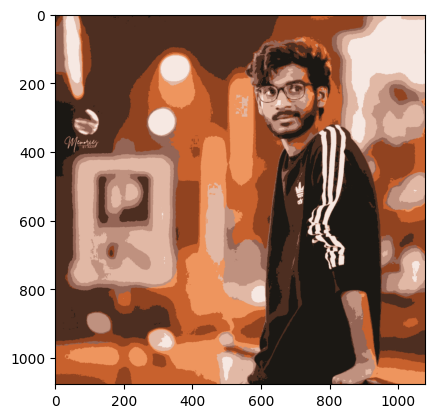

In [97]:
img = color_qunatization(img, k=9)

plt.imshow(img)
plt.show()

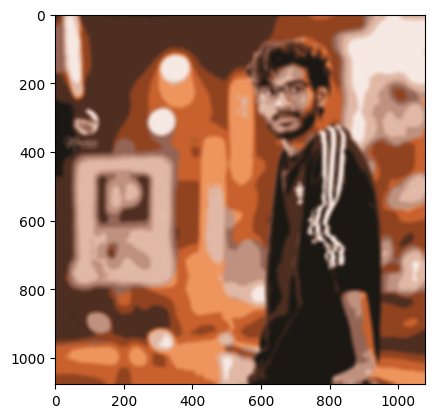

In [116]:
#REDUCE THE NOISE
blurred = cv2.bilateralFilter(img,d=19,sigmaColor=1000,sigmaSpace=1000)

plt.imshow(blurred)
plt.show()

Convert the original image to Cartoon effect


In [99]:
def cartoon():
  c = cv2.bitwise_and(blurred,blurred,mask = edges)
  plt.imshow(org_img)
  plt.title("orginal image")
  plt.show()

  plt.imshow(c)
  plt.title("cartoonfied_image")
  plt.show()
  plt.imsave("output.png",c)

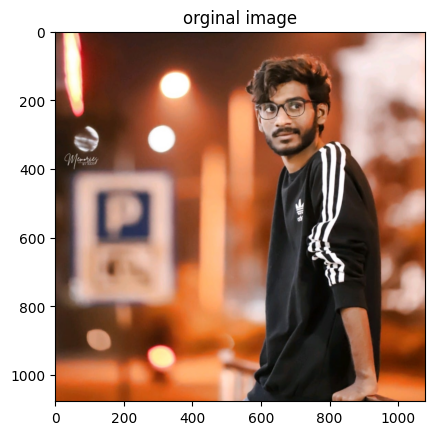

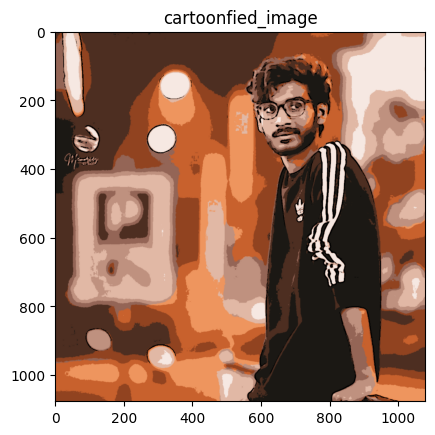

In [100]:

cartoon()



In [101]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Load the input image
input_image = Image.open(filename)

# Perform some machine learning operations
# ...

# Save the processed image
output_image = input_image  # Replace with your processed image
output_image.save('output_image.jpg')


Extraction many images from single image


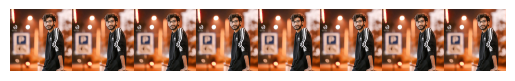

In [102]:
def display_multiple_images(image_path, num_images):
    image = Image.open(image_path)

    new_width = image.width * num_images
    new_image = Image.new('RGB', (new_width, image.height))

    for i in range(num_images):
        new_image.paste(image, (i * image.width, 0))

    plt.imshow(new_image)
    plt.axis('off')
    plt.show()

image_path = filename
num_images = 8
display_multiple_images(image_path, num_images)

Back-and-white image format


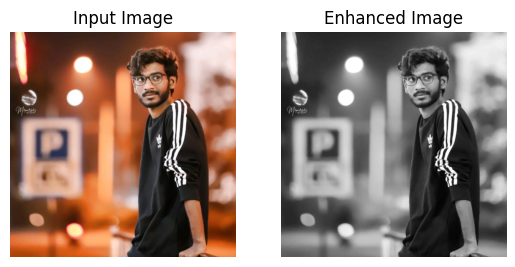

In [103]:
def increase_visuality(image):
    grayscale_image = image.convert("L")

    return grayscale_image
image_path = filename
input_image = Image.open(image_path)
if input_image is None:
    print("Failed to load the image. Please check the path and try again.")
else:
    enhanced_image = increase_visuality(input_image)

    plt.subplot(1, 2, 1)
    plt.imshow(input_image)
    plt.title('Input Image')
    plt.axis('off')

    # Display the enhanced image
    plt.subplot(1, 2, 2)
    plt.imshow(enhanced_image, cmap='gray')
    plt.title('Enhanced Image')
    plt.axis('off')

    # Show the plot
    plt.show()

Decrease the image brightness


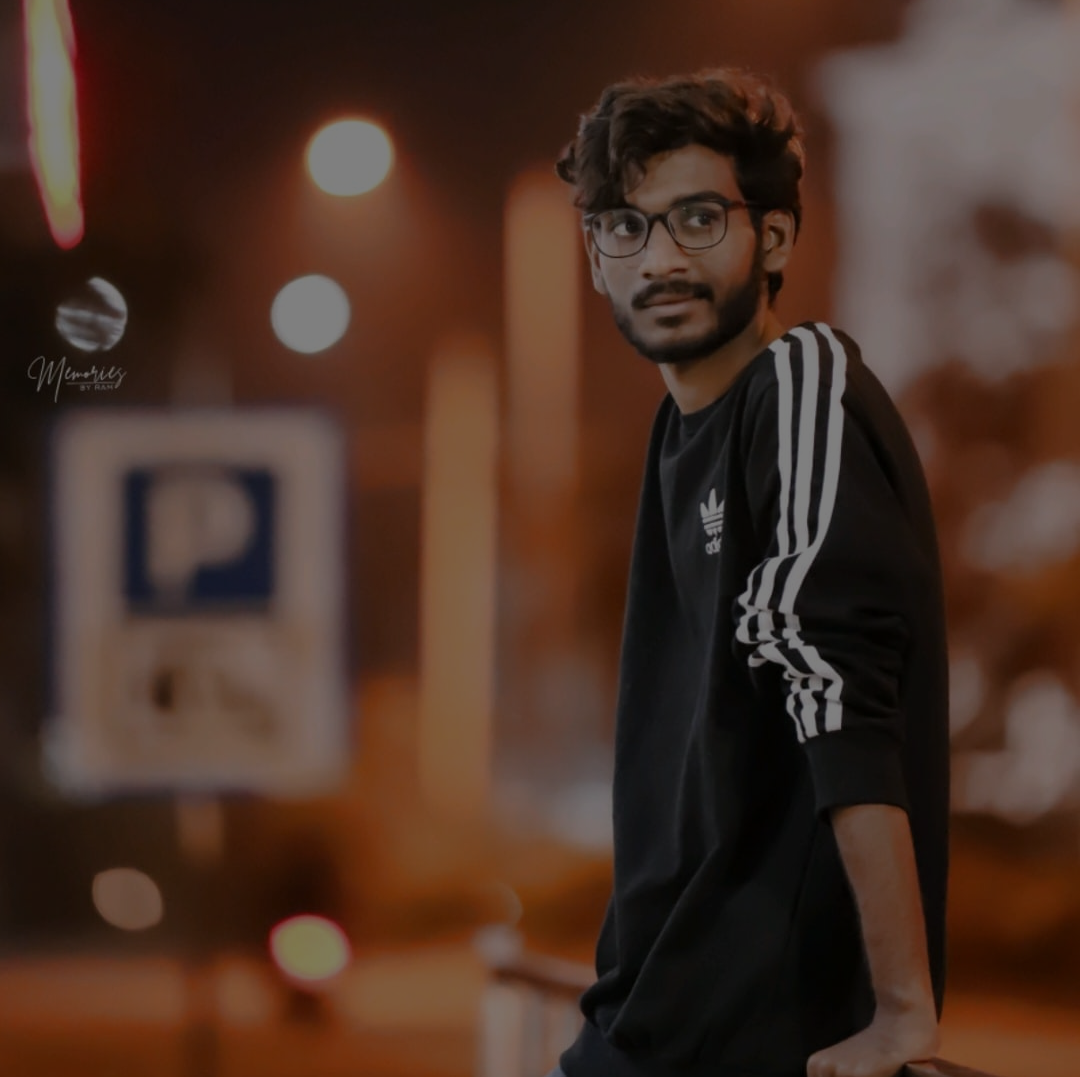

In [104]:

def increase_brightness(image_path, brightness_factor):
    image = Image.open(image_path)

    enhancer = ImageEnhance.Brightness(image)
    enhanced_image = enhancer.enhance(brightness_factor)

    return enhanced_image

image_path = filename
brightness_factor = 0.5


brightened_image = increase_brightness(image_path, brightness_factor)
brightened_image.show()

Increase the brightness of the images


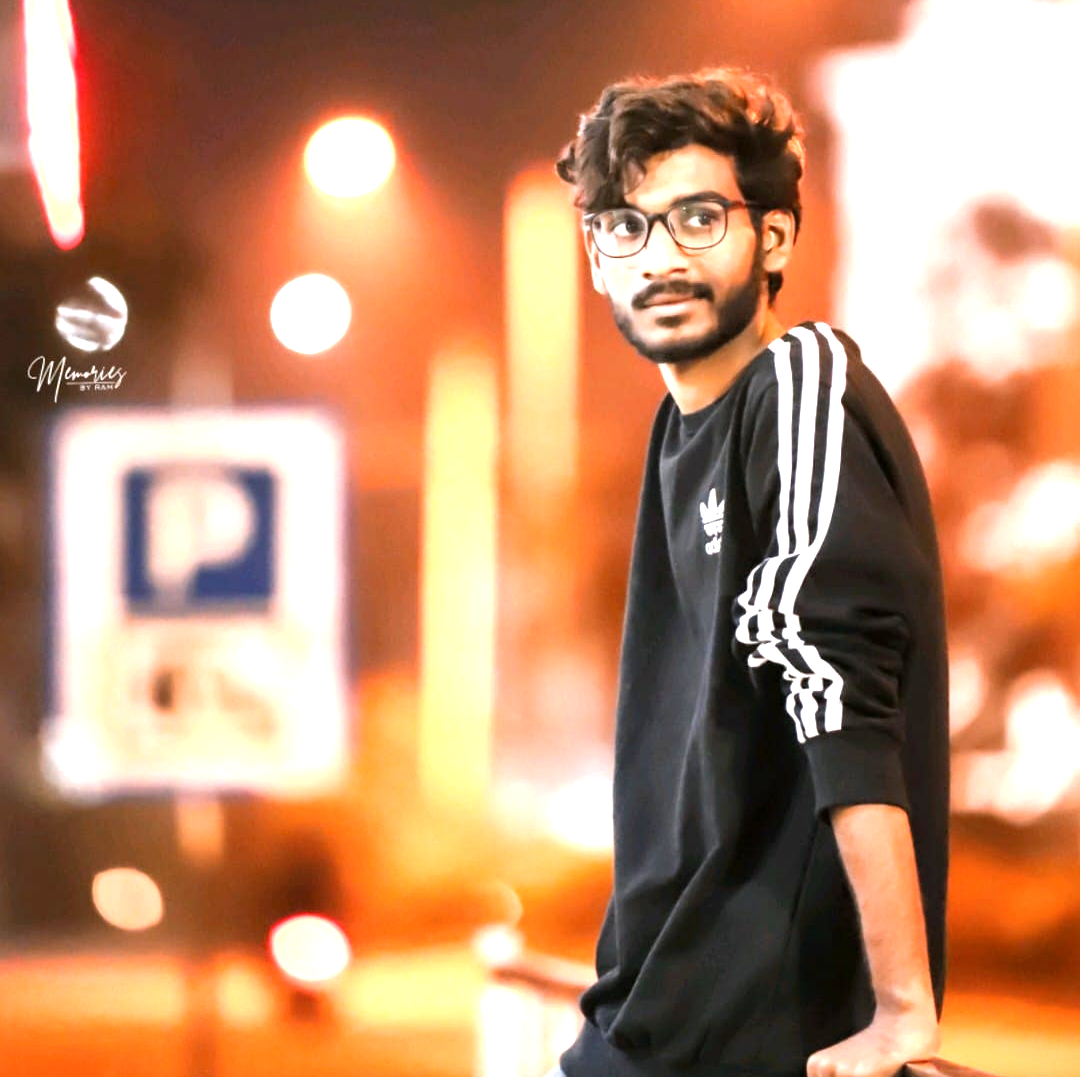

In [105]:
def increase_brightness(image_path, brightness_factor):
    image = Image.open(image_path)

    enhancer = ImageEnhance.Brightness(image)
    enhanced_image = enhancer.enhance(brightness_factor)

    return enhanced_image

image_path = filename
brightness_factor = 1.5


brightened_image = increase_brightness(image_path, brightness_factor)
brightened_image.show()

Grid the images


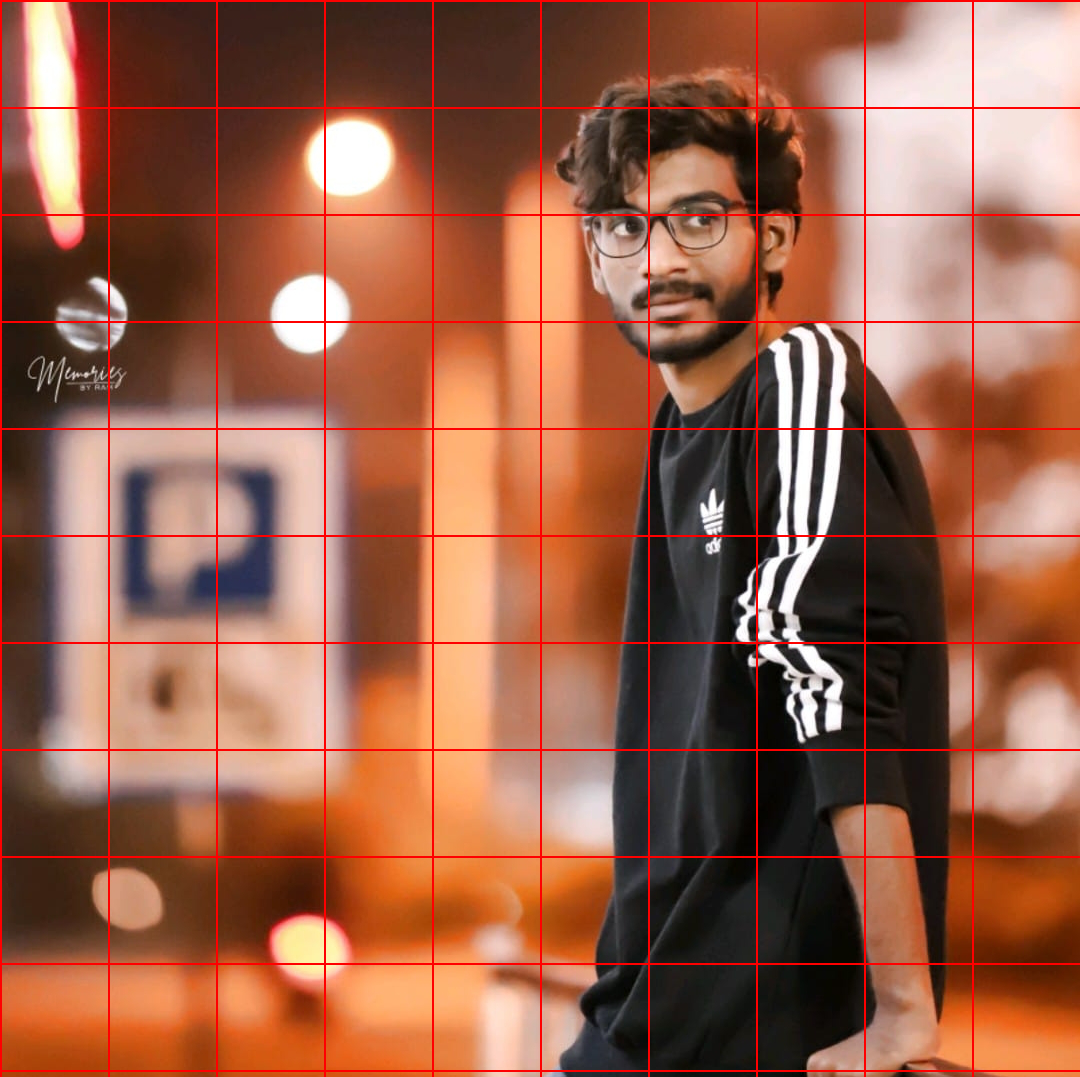

In [106]:
def draw_grid(image_path, grid_size):
    image = Image.open(image_path)

    draw = ImageDraw.Draw(image)

    width, height = image.size

    cell_width = width // grid_size
    cell_height = height // grid_size

    for x in range(0, width, cell_width):
        draw.line([(x, 0), (x, height)], fill='red', width=2)

    for y in range(0, height, cell_height):
        draw.line([(0, y), (width, y)], fill='red', width=2)

    return image

image_path = filename
grid_size = 10

image_with_grid = draw_grid(image_path, grid_size)
image_with_grid.show()

Rotating the Image using Numpy pandas and Matplot.pyplot



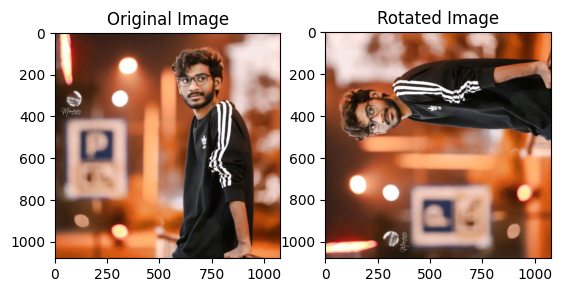

In [107]:
image = plt.imread(filename)
rotated_image = np.rot90(image, k=1)

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title('Rotated Image')
plt.imshow(rotated_image)



plt.show()


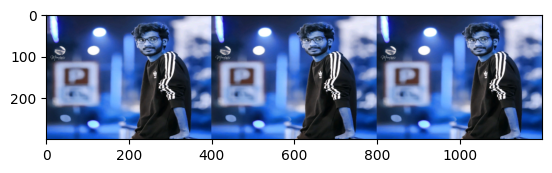

In [108]:
import cv2
import numpy as np

# Load the images
image1 = cv2.imread(filename)
image2 = cv2.imread(filename)
image3 = cv2.imread(filename)

# Resize the images to the same dimensions
width = 400
height = 300
image1 = cv2.resize(image1, (width, height))
image2 = cv2.resize(image2, (width, height))
image3 = cv2.resize(image3, (width, height))

# Create a blank frame to hold the combined images
combined_frame = np.zeros((height, width * 3, 3), dtype=np.uint8)

# Add the images to the combined frame
combined_frame[:, :width] = image1
combined_frame[:, width:width*2] = image2
combined_frame[:, width*2:] = image3

# Display the combined frame
plt.imshow(combined_frame)

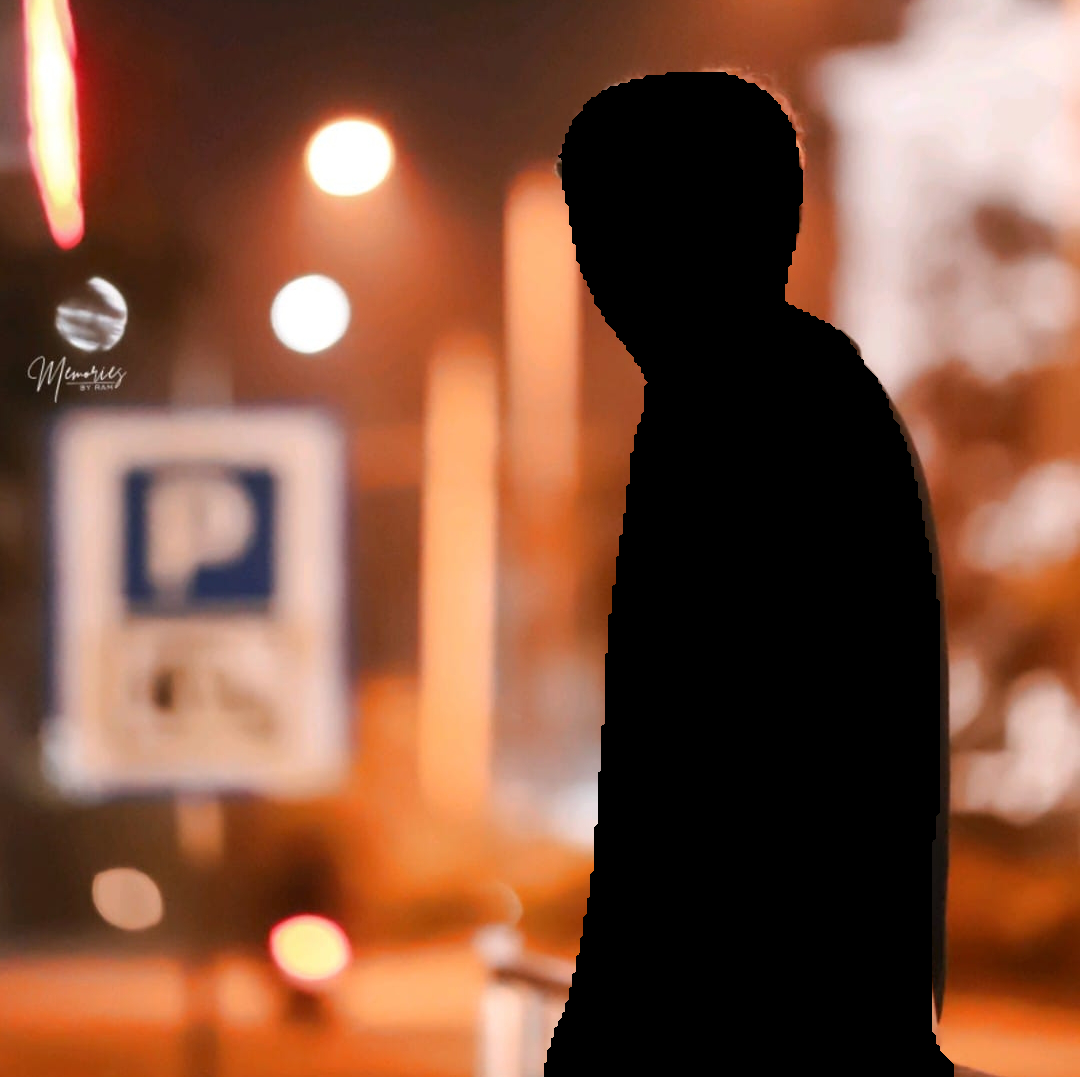

In [118]:
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision.models.segmentation import deeplabv3_resnet50

# Load the input image
input_image = Image.open(filename)

# Preprocess the input image
preprocess = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
input_tensor = preprocess(input_image).unsqueeze(0)

# Load the pre-trained DeepLabV3 model
model = deeplabv3_resnet50(pretrained=True)
model.eval()

# Perform semantic segmentation
with torch.no_grad():
    output = model(input_tensor)['out']
    _, predicted = torch.max(output, 1)

# Generate the mask by filtering out the background pixels
background_label = 0  # Background class label
mask = predicted == background_label

# Resize the mask to match the input image size
resized_mask = transforms.Resize((input_image.size[1], input_image.size[0]))(mask.byte())

# Convert the mask tensor to a binary mask (0s and 1s)
resized_mask = resized_mask.squeeze().numpy()

# Apply the mask to the input image
input_array = transforms.ToTensor()(input_image)
masked_image = input_array * resized_mask

# Convert the masked image tensor to PIL image
masked_image = transforms.ToPILImage()(masked_image)

# Save the masked image
masked_image.show('output_image.jpg')
#plt.show(images)
